# Теория

## KMeans

K-means определяет прототип в терминах центроида, который обычно является средним 
значением группы точек и обычно применяется к объектам в непрерывном n-мерном пространстве. 
K-medoid определяет прототип в терминах медоида, который является наиболее репрезентативной 
точкой для группы точек и может применяться к широкому диапазону данных, поскольку требует
только меры близости для пары объектов. Хотя центроид почти никогда не соответствует
фактической точке данных, медоид по своему определению должен быть фактической
точкой данных.

Сначала мы выбираем K начальных центроидов, где K — заданный пользователем
параметр, а именно количество желаемых кластеров. Затем каждая точка присваивается
ближайшему центроиду, и каждый набор точек, назначенный центроиду, представляет
собой кластер. Затем центроид каждого кластера обновляется на основе точек, назначенных
кластеру. Мы повторяем шаги назначения и обновления до тех пор, пока ни одна точка не
изменит кластеры, или, что то же самое, до тех пор, пока центроиды не останутся теми же.

Сильные и слабые стороны

KMeans просты и могут использоваться для самых разных типов данных. Это также весьма
эффективно, хотя часто выполняется несколько прогонов. Некоторые варианты, включая
разделение K-средних пополам, еще более эффективны и менее подвержены проблемам
инициализации. K-means подходит не для всех типов данных.
Он не может обрабатывать нешаровые кластеры или кластеры разных размеров
и плотности, хотя обычно может найти чистые подкластеры, если указано достаточно
большое количество кластеров. K-means также имеет проблемы с кластеризацией
данных, содержащих выбросы. Обнаружение и удаление выбросов может существенно
помочь в таких ситуациях. Наконец, K-средние ограничены данными, для которых
существует понятие центра (центроида).

## Агломеративная иерархическая кластеризация

Методы иерархической кластеризации являются второй важной категорией методов
кластеризации. Как и в случае с K-средними, эти подходы относительно старые по
сравнению со многими алгоритмами кластеризации, но они до сих пор широко
используются.

Существует два основных подхода к созданию иерархической кластеризации:

_Агломерация_: начните с точек как отдельных кластеров и на каждом этапе объединяйте
ближайшую пару кластеров. Для этого необходимо определить понятие близости
кластера.

_Разделение_: начните с одного комплексного кластера и на каждом этапе разбивайте
кластер до тех пор, пока не останутся только одноэлементные кластеры из отдельных
точек. В этом случае нам нужно решить, какой кластер разбивать на каждом шаге и
как это делать.

## DBSCAN

Кластеризация на основе плотности позволяет обнаружить области с высокой плотностью,
которые отделены друг от друга областями с низкой плотностью. DBSCAN — это простой и
эффективный алгоритм кластеризации на основе плотности, который иллюстрирует ряд важных
концепций, важных для любого подхода к кластеризации на основе плотности.

Сильные и слабые стороны

Поскольку DBSCAN использует определение кластера на основе плотности, оно относительно
устойчив к шуму и может обрабатывать кластеры произвольных форм и размеров. Таким образом,
DBSCAN может найти множество кластеров, которые невозможно найти с помощью K-средних. 
Однако у DBSCAN возникают проблемы, когда плотность кластеров сильно различается. 
У него также возникают проблемы с многомерными данными, поскольку для таких данных 
сложнее определить плотность.

# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, HDBSCAN
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score

from clustergram import Clustergram

# Загрузка и анализ данных

700 good and 300 bad credits with 20 predictor variables

In [2]:
column_names = [
    "status",  # status of the debtor's checking account with the bank (categorical)
    "duration",  # credit duration in months (quantitative)
    "credit_history",  # history of compliance with previous or concurrent credit contracts (categorical)
    "purpose",  # purpose for which the credit is needed (categorical)
    "amount",   # credit amount in DM (quantitative; result of monotonic transformation; 
                # actual data and type of transformation unknown)
    "savings",  # debtor's savings (categorical)
    "employment_duration",  # duration of debtor's employment with current employer 
                            # (ordinal; discretized quantitative)
    "installment_rate",  # credit installments as a percentage of debtor's disposable income 
                         # (ordinal; discretized quantitative)
    "personal_status_sex",  # combined information on sex and marital status; categorical; 
                            # sex cannot be recovered from the variable, because male singles 
                            # and female non-singles are coded with the same code (2); 
                            # female widows cannot be easily classified, because the code 
                            # table does not list them in any of the female categories
    "other_debtors",  # Is there another debtor or a guarantor for the credit? (categorical)
    "present_residence",  # length of time (in years) the debtor lives in the present residence 
                          # (ordinal; discretized quantitative)
    "property",  # the debtor's most valuable property, i.e. the highest possible code is used. 
                 # Code 2 is used, if codes 3 or 4 are not applicable and there is a car or any 
                 # other relevant property that does not fall under variable sparkont. (ordinal)
    "age",  # age in years (quantitative)
    "other_installment_plans",  # installment plans from providers other than the credit-giving bank (categorical)
    "housing",  # type of housing the debtor lives in (categorical)
    "number_credits",  # number of credits including the current one the debtor has (or had) at this bank 
                       # (ordinal, discretized quantitative); 
                       # contrary to Fahrmeir and HamerleÃ¢â‚¬â„¢s (1984) statement, the original data values are not available.
    "job",  # quality of debtor's job (ordinal)
    "people_liable",  # number of persons who financially depend on the debtor 
                      # (i.e., are entitled to maintenance) (binary, discretized quantitative)
    "telephone",  # Is there a telephone landline registered on the debtor's name? 
                  # (binary; remember that the data are from the 1970s)
    "foreign_worker",  # Is the debtor a foreign worker? (binary)
    "credit_risk",  # Has the credit contract been complied with (good) or not (bad) ? (binary)
]

cat_features = [
    "status",  # status of the debtor's checking account with the bank (categorical)
    "credit_history",  # history of compliance with previous or concurrent credit contracts (categorical)
    "purpose",  # purpose for which the credit is needed (categorical)
    "savings",  # debtor's savings (categorical)
    "personal_status_sex",  # combined information on sex and marital status; categorical; 
                            # sex cannot be recovered from the variable, because male singles 
                            # and female non-singles are coded with the same code (2); 
                            # female widows cannot be easily classified, because the code 
                            # table does not list them in any of the female categories
    "other_debtors",  # Is there another debtor or a guarantor for the credit? (categorical)
    "other_installment_plans",  # installment plans from providers other than the credit-giving bank (categorical)
    "housing",  # type of housing the debtor lives in (categorical)
]

quant_features = [    
    "duration",  # credit duration in months (quantitative)
    "amount",   # credit amount in DM (quantitative; result of monotonic transformation; 
                # actual data and type of transformation unknown)
    "employment_duration",  # duration of debtor's employment with current employer 
                            # (ordinal; discretized quantitative)
    "installment_rate",  # credit installments as a percentage of debtor's disposable income 
                         # (ordinal; discretized quantitative)
    "present_residence",  # length of time (in years) the debtor lives in the present residence 
                          # (ordinal; discretized quantitative)
    "property",  # the debtor's most valuable property, i.e. the highest possible code is used. 
                 # Code 2 is used, if codes 3 or 4 are not applicable and there is a car or any 
                 # other relevant property that does not fall under variable sparkont. (ordinal)
    "age",  # age in years (quantitative)
    "number_credits",  # number of credits including the current one the debtor has (or had) at this bank 
                       # (ordinal, discretized quantitative); 
    "job",  # quality of debtor's job (ordinal)
]

binary_features = [
    "people_liable",  # number of persons who financially depend on the debtor 
                      # (i.e., are entitled to maintenance) (binary, discretized quantitative)    
    "telephone",  # Is there a telephone landline registered on the debtor's name? 
                  # (binary; remember that the data are from the 1970s)
    "foreign_worker",  # Is the debtor a foreign worker? (binary)
]

target = [
    "credit_risk",  # Has the credit contract been complied with (good) or not (bad) ? (binary)
]

In [3]:
df = pd.read_csv("./data/SouthGermanCredit.asc", delimiter=" ", header=0, names=column_names)
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

 Более подробный анализ датасета я делал в прошлом домашнем задании.
 Сейчас повторюсь, что несмотря на то, что в датасете заявлено наличие категориальных, 
 количественных и бинарных фич, по факту имеем все количественные. 
 Даже те, что бинарные, содержат значения не 0 и 1, а 1 и 2.
 Пропущенных значений в датасете нет, таргет не имеет яркого дисбаланса. 

Выведем графики распределения из прошлого ДЗ, для того, чтобы иметь впоследствии
возможность сравнить распределение до кластеризации и после, если возникнет такая потребность.

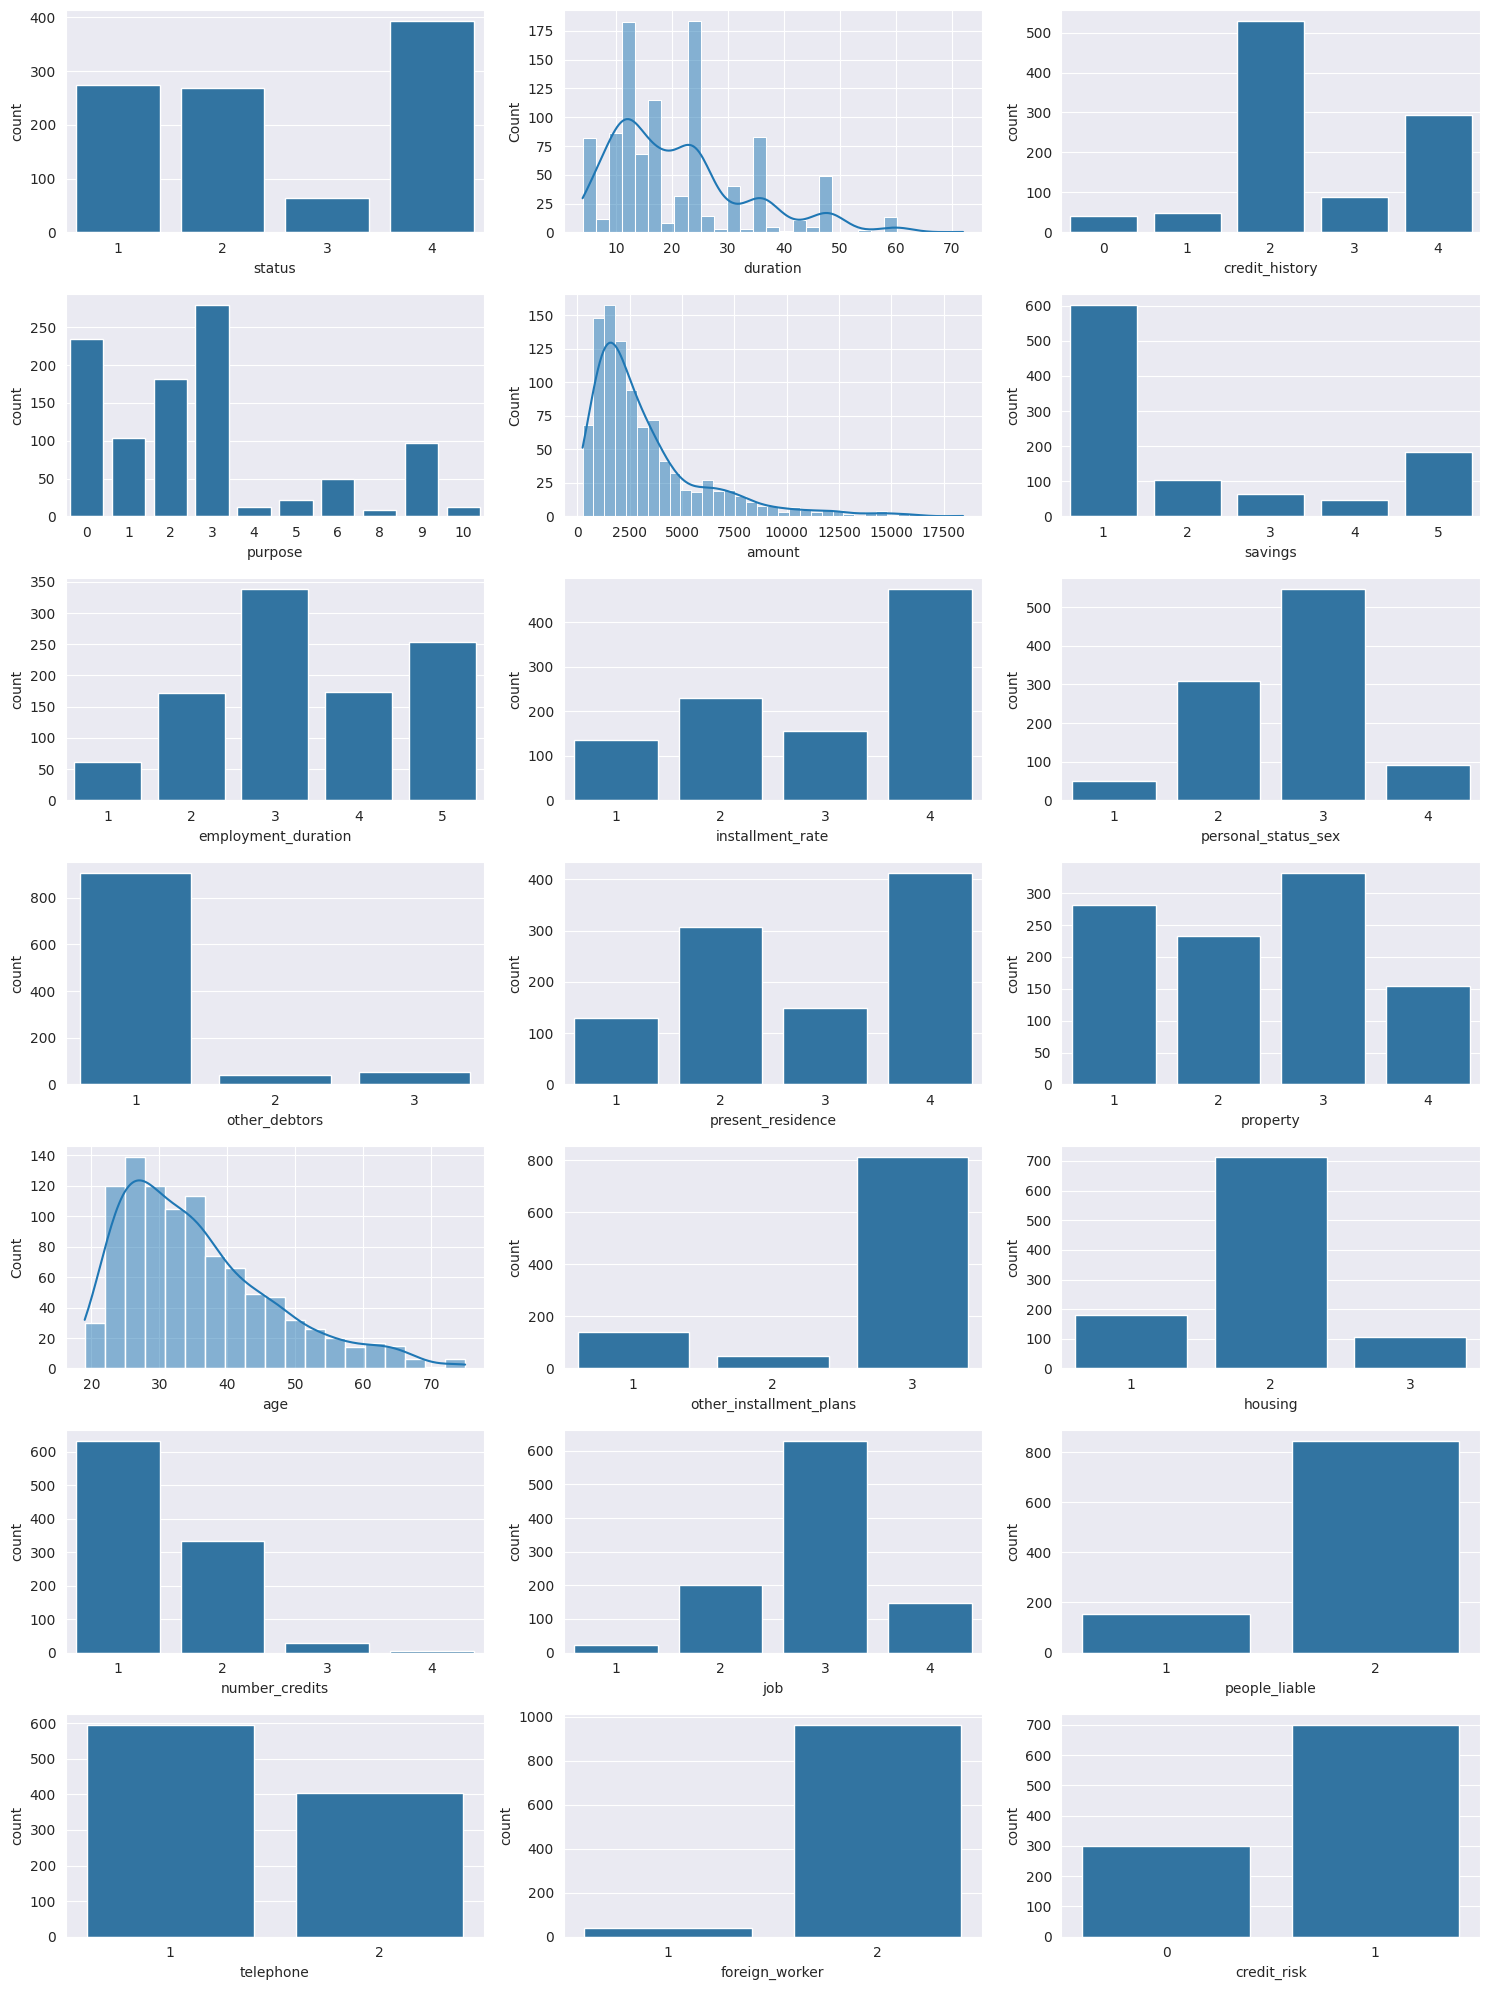

In [5]:
n_rows = 7
n_cols = 3
_, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 20))

for idx, feature in enumerate(column_names):
    row = idx // n_cols
    col = idx % n_cols
    if feature in ["duration", "amount", "age"]:
        sns.histplot(data=df, x=feature, ax=axes[row, col], kde=True)
    else:
        sns.countplot(data=df, x=feature, ax=axes[row, col])

plt.tight_layout()
plt.show()

# Кластеризация (полный набор данных)

Алгоритмы кластеризации основаны на измерении расстояний между точками в многомерном пространстве.
Поэтому прежде чем перейти непосредственно к кластеризации, выполним масштабирование признаков

In [6]:
scaler = MinMaxScaler()
df_rescaled = scaler.fit_transform(df)

Для определения оптимального количества кластеров нам потребуются метрики.
Будем использовать следующие:
`Davies-Bouldin score` - при оптимальном разбиении метрика принимает МИНИМАЛЬНОЕ значение
`Calinski and Harabasz score` - при оптимальном разбиении метрика принимает МАКСИМАЛЬНОЕ значение
`Silhouette Coefficient` - при оптимальном разбиении метрика также принимает МАКСИМАЛЬНОЕ значение

In [7]:
# Заготовим списки для хранения значений метрик при различном количестве кластеров
d_b_scores = []
c_h_scores = []
sil_scores = []

## KMeans

In [8]:
# Пробуем последовательно разбить датасет на от 2 до 10 кластеров
for c in range(2, 11):
    kmeans = KMeans(n_clusters=c, random_state=42, n_init="auto").fit(df_rescaled)
    d_b_scores.append(davies_bouldin_score(df_rescaled, kmeans.labels_))
    c_h_scores.append(calinski_harabasz_score(df_rescaled, kmeans.labels_))
    sil_scores.append(silhouette_score(df_rescaled, kmeans.labels_))
    
print("Clusters according Davies-Bouldin score: ", d_b_scores.index(min(d_b_scores)) + 2)
print("Clusters according Calinski and Harabasz score: ", c_h_scores.index(max(c_h_scores)) + 2)
print("Clusters according Silhouette Coefficient: ", sil_scores.index(max(sil_scores)) + 2)

Clusters according Davies-Bouldin score:  10
Clusters according Calinski and Harabasz score:  2
Clusters according Silhouette Coefficient:  2


In [9]:
def plot_clustering_scores(d_b_scores, c_h_scores, sil_scores):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 4, 1)
    plt.plot(range(2, 11), d_b_scores, marker='o', linestyle='--')
    plt.xlabel('Clusters quantity')
    plt.ylabel('Davies-Bouldin Score')
    plt.title('Davies-Bouldin Score\n(looking for MIN)')
    
    plt.subplot(1, 4, 2)
    plt.plot(range(2, 11), c_h_scores, marker='o', linestyle='--')
    plt.xlabel('Clusters quantity')
    plt.ylabel('Calinski and Harabasz score')
    plt.title('Calinski and Harabasz score\n(looking for MAX)')
    
    plt.subplot(1, 4, 3)
    plt.plot(range(2, 11), sil_scores, marker='o', linestyle='--')
    plt.xlabel('Clusters quantity')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score\n(looking for MAX)')
    
    plt.tight_layout()
    plt.show()

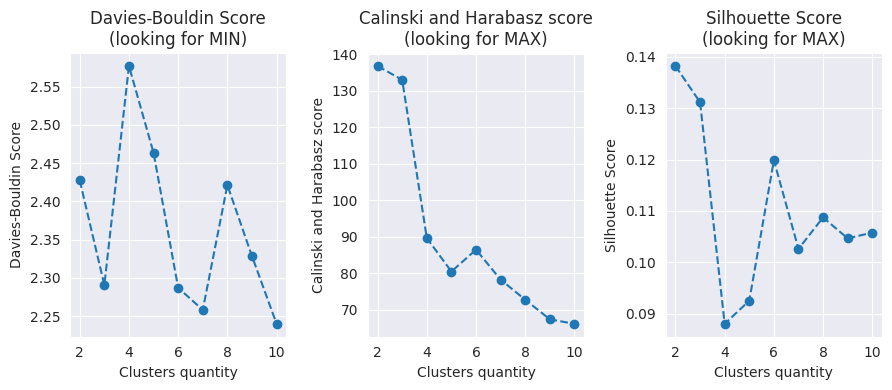

In [10]:
plot_clustering_scores(d_b_scores, c_h_scores, sil_scores)

Две метрики из трех указывают на то, что следует выбрать разбиение на 2 кластера.

Повторим кластризацию с параметром `n_clusters=2` и сохраним результат

In [11]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto").fit(df_rescaled)
kmeans_2_full_df = kmeans.labels_

Судя по количеству кластеров есть подозрение, что кластеризация может быть обусловлена 
признаком `credit_risk`. Проверим это. 

Для начала посмотрим все ли фичи видела модель.

In [12]:
kmeans.n_features_in_

21

При тренировке модель видела все 21 признак. 

Посмотрим на признак `credit_risk` в разрезе получившихся кластеров

In [13]:
tmp_df = pd.concat([df[target], pd.DataFrame(kmeans_2_full_df, columns=["KMeans_2_full_df"])], axis=1)

<Axes: xlabel='credit_risk', ylabel='count'>

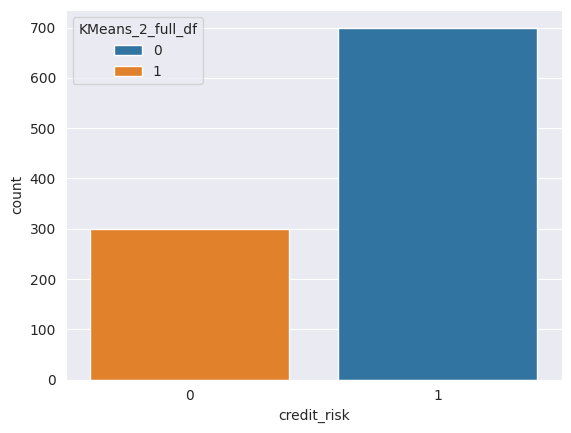

In [14]:
sns.countplot(data=tmp_df, x=target[0], hue="KMeans_2_full_df")

Получается так, что абсолютно все значения = 1 признака `credit_risk` попали в кластер 0
и все значения = 0 попали в кластер 1.

Повторим кластеризацию удалив данный признак из датасета.

In [15]:
df_rescaled_ = df_rescaled[:, :-1]

In [16]:
d_b_scores.clear()
c_h_scores.clear()
sil_scores.clear()

for c in range(2, 11):
    kmeans = KMeans(n_clusters=c, random_state=42, n_init="auto").fit(df_rescaled_)
    d_b_scores.append(davies_bouldin_score(df_rescaled_, kmeans.labels_))
    c_h_scores.append(calinski_harabasz_score(df_rescaled_, kmeans.labels_))
    sil_scores.append(silhouette_score(df_rescaled_, kmeans.labels_))
    
print("Clusters according Davies-Bouldin score: ", d_b_scores.index(min(d_b_scores)) + 2)
print("Clusters according Calinski and Harabasz score: ", c_h_scores.index(max(c_h_scores)) + 2)
print("Clusters according Silhouette Coefficient: ", sil_scores.index(max(sil_scores)) + 2)

Clusters according Davies-Bouldin score:  3
Clusters according Calinski and Harabasz score:  3
Clusters according Silhouette Coefficient:  2


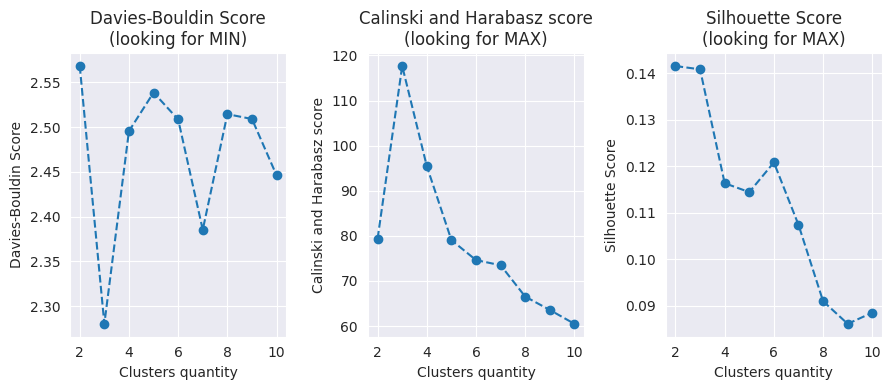

In [17]:
plot_clustering_scores(d_b_scores, c_h_scores, sil_scores)

OK. Разобъем на 3 кластера и сохраним результат

In [18]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto").fit(df_rescaled_)
kmeans_3_full_wo_target = kmeans.labels_

## AgglomerativeClustering

In [19]:
d_b_scores.clear()
c_h_scores.clear()
sil_scores.clear()

for c in range(2, 11):
    agg_clust = AgglomerativeClustering(n_clusters=c).fit(df_rescaled_)
    d_b_scores.append(davies_bouldin_score(df_rescaled_, agg_clust.labels_))
    c_h_scores.append(calinski_harabasz_score(df_rescaled_, agg_clust.labels_))
    sil_scores.append(silhouette_score(df_rescaled_, agg_clust.labels_))
    
print("Clusters according Davies-Bouldin score: ", d_b_scores.index(min(d_b_scores)) + 2)
print("Clusters according Calinski and Harabasz score: ", c_h_scores.index(max(c_h_scores)) + 2)
print("Clusters according Silhouette Coefficient: ", sil_scores.index(max(sil_scores)) + 2)

Clusters according Davies-Bouldin score:  4
Clusters according Calinski and Harabasz score:  2
Clusters according Silhouette Coefficient:  4


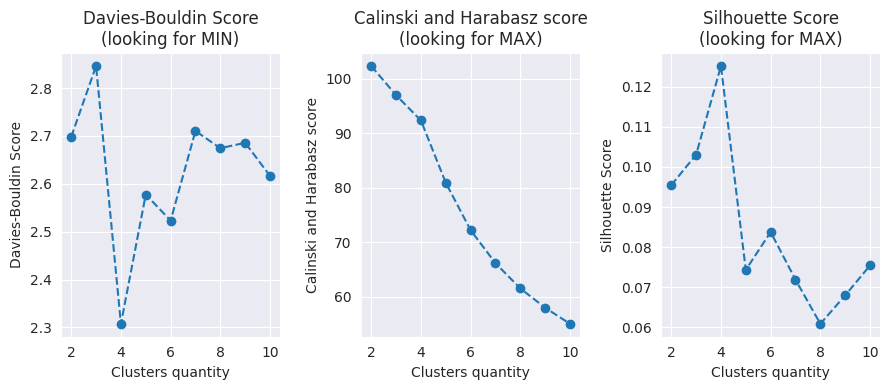

In [20]:
plot_clustering_scores(d_b_scores, c_h_scores, sil_scores)

Метрики в случае с алгоритмом агломеративной кластеризации указывают на наличие 4 кластеров.
Сохраним результат 

In [21]:
agg_clust = AgglomerativeClustering(n_clusters=4).fit(df_rescaled_)
agg_4_full_wo_target = agg_clust.labels_

## HDBSCAN

In [22]:
from pprint import pprint

eps = {}

for e in np.arange(0, 5, 0.2):
    hdbscan = HDBSCAN(cluster_selection_epsilon=e).fit(df_rescaled_)
    eps[round(e, 1)] = {
        "d_b_score": davies_bouldin_score(df_rescaled_, hdbscan.labels_),
        "c_h_score": calinski_harabasz_score(df_rescaled_, hdbscan.labels_),
        "sil_score": silhouette_score(df_rescaled_, hdbscan.labels_),
        "clusters": np.unique(hdbscan.labels_),
        "n_clusters": np.unique(hdbscan.labels_).__len__() - 1
    }
    
pprint(eps)

{0.0: {'c_h_score': 47.492286008699324,
       'clusters': array([-1,  0,  1,  2,  3]),
       'd_b_score': 2.9684584456307523,
       'n_clusters': 4,
       'sil_score': 0.04978953870667162},
 0.2: {'c_h_score': 47.492286008699324,
       'clusters': array([-1,  0,  1,  2,  3]),
       'd_b_score': 2.9684584456307523,
       'n_clusters': 4,
       'sil_score': 0.04978953870667162},
 0.4: {'c_h_score': 47.492286008699324,
       'clusters': array([-1,  0,  1,  2,  3]),
       'd_b_score': 2.9684584456307523,
       'n_clusters': 4,
       'sil_score': 0.04978953870667162},
 0.6: {'c_h_score': 47.492286008699324,
       'clusters': array([-1,  0,  1,  2,  3]),
       'd_b_score': 2.9684584456307523,
       'n_clusters': 4,
       'sil_score': 0.04978953870667162},
 0.8: {'c_h_score': 47.492286008699324,
       'clusters': array([-1,  0,  1,  2,  3]),
       'd_b_score': 2.9684584456307523,
       'n_clusters': 4,
       'sil_score': 0.04978953870667162},
 1.0: {'c_h_score': 47.4922860

In [23]:
eps_with_min_d_b_score = sorted(eps, key=lambda e: eps[e]["d_b_score"])[0]
print(f"Epsilon with MIN Davies-Bouldin score: {eps_with_min_d_b_score}\n")
pprint(eps[eps_with_min_d_b_score])

Epsilon with MIN Davies-Bouldin score: 0.0

{'c_h_score': 47.492286008699324,
 'clusters': array([-1,  0,  1,  2,  3]),
 'd_b_score': 2.9684584456307523,
 'n_clusters': 4,
 'sil_score': 0.04978953870667162}


In [24]:
eps_with_max_c_h_score = sorted(eps, key=lambda e: eps[e]["c_h_score"])[-1]
print(f"Epsilon with MAX Calinski and Harabasz score: {eps_with_max_c_h_score}\n")
pprint(eps[eps_with_max_c_h_score])

Epsilon with MAX Calinski and Harabasz score: 1.0

{'c_h_score': 47.492286008699324,
 'clusters': array([-1,  0,  1,  2,  3]),
 'd_b_score': 2.9684584456307523,
 'n_clusters': 4,
 'sil_score': 0.04978953870667162}


In [25]:
eps_with_max_sil_score = sorted(eps, key=lambda e: eps[e]["sil_score"])[-1]
print(f"Epsilon with MAX Silhouette Coefficient: {eps_with_max_sil_score}\n")
pprint(eps[eps_with_max_sil_score])

Epsilon with MAX Silhouette Coefficient: 4.8

{'c_h_score': 28.507603047320988,
 'clusters': array([-1,  0,  1]),
 'd_b_score': 3.8282045392050503,
 'n_clusters': 2,
 'sil_score': 0.06342830313107412}


Результаты шо попало.
:)

Построим графики, возможно это добавит ясности

## Графический анализ

Сведем датасет к двум фичам и кинем на плоскость

In [26]:
pca = PCA(n_components=2, random_state=42)
df_2d = pca.fit_transform(df_rescaled_)
df_2d

array([[-0.57105763,  0.33205636],
       [-0.75476409,  0.18633814],
       [-0.58654575, -0.07626044],
       ...,
       [ 1.2401673 , -0.51738398],
       [ 0.63520144,  0.14188259],
       [-0.13570738, -0.12314724]])

<Axes: xlabel='0', ylabel='1'>

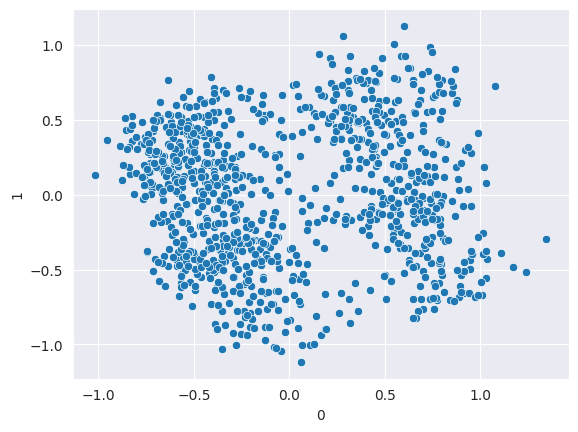

In [27]:
sns.scatterplot(data=pd.DataFrame(df_2d), x=0, y=1)

Наиболее очевидно просматриваются 2 кластера, но они также имеют некоторое 
утоньшение посредине, т.е. наверное можно также говорить и про 4.
Выходит так, что метрики были все по-своему правы

Разбиваем на 2 кластера. Epsilon = 4.8

In [28]:
hdbscan = HDBSCAN(cluster_selection_epsilon=4.8).fit(df_rescaled_)
hdbscan_2_full_wo_target = hdbscan.labels_

In [29]:
df_2d_clust = np.concatenate([df_2d, hdbscan_2_full_wo_target.reshape(-1, 1)], axis=1)
df_2d_clust

array([[-0.57105763,  0.33205636,  0.        ],
       [-0.75476409,  0.18633814,  0.        ],
       [-0.58654575, -0.07626044,  0.        ],
       ...,
       [ 1.2401673 , -0.51738398,  0.        ],
       [ 0.63520144,  0.14188259, -1.        ],
       [-0.13570738, -0.12314724,  0.        ]])

<Axes: xlabel='0', ylabel='1'>

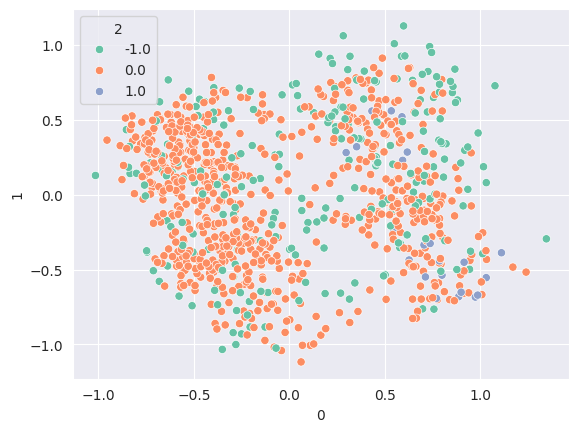

In [30]:
sns.scatterplot(data=pd.DataFrame(df_2d_clust), x=0, y=1, hue=2, palette="Set2")

Разбиваем на 4 кластера. Epsilon = 1.0

In [31]:
hdbscan = HDBSCAN(cluster_selection_epsilon=1.0).fit(df_rescaled_)
hdbscan_4_full_wo_target = hdbscan.labels_

<Axes: xlabel='0', ylabel='1'>

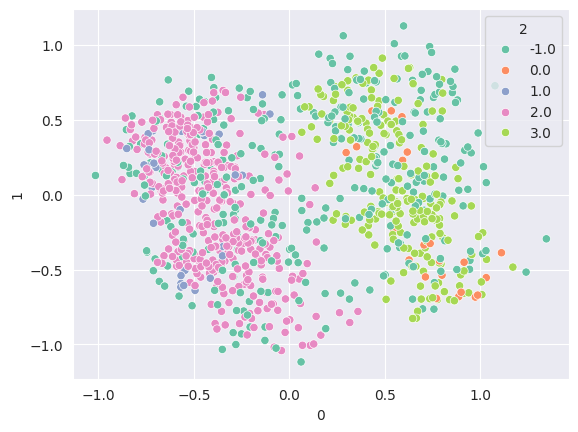

In [32]:
df_2d_clust = np.concatenate([df_2d, hdbscan_4_full_wo_target.reshape(-1, 1)], axis=1)
sns.scatterplot(data=pd.DataFrame(df_2d_clust), x=0, y=1, hue=2, palette="Set2")

Результаты немного не те, что я ожидал ))
С другой стороны, мы измеряли плотность точек и искали кластеры в 20-мерном пространстве,
на графике же мы видим проекцию 20-мерного пространство в 2-мерное и все неочевидно.

Я не ожидал, что точки, определенные алгоритмом как выбросы, будут присутствовать 
практически равномерно на всем графике. Отфильтруем их.

<Axes: xlabel='0', ylabel='1'>

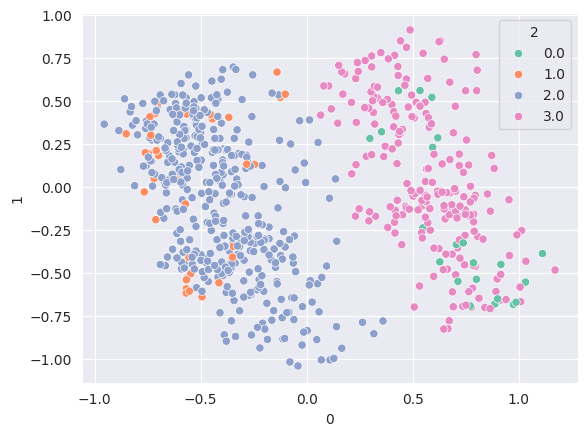

In [33]:
non_outlier_mask = df_2d_clust[:, 2] != -1
sns.scatterplot(data=pd.DataFrame(df_2d_clust[non_outlier_mask]), x=0, y=1, hue=2, palette="Set2")

Так уже гораздо наглядней. При этом нужно отметить, что точки разделились на
4 кластера вовсе не так как я ожидал. Малочисленные кластеры 0 и 1 вплетены 
в мажорные кластеры 3 и 2 соответственно, а не расположены отдельно.
Возможно это так выглядит именно из-за проекции 20-мерного пространства,
в котором было проведено разбиение на кластеры, в 2-мерное пространство графика.

Для проверки этой гипотезы можно было бы, например, свести датасет не к 2, а к 3 
координатам и построить графики распределения отдельно в каждой паре координат.
Условно: (X Y), (X Z), (Y Z)

Другая гипотеза заключается в том, что наши данные имеют иерархическую кластеризацию,
т.е. кластера 1 и 2 являются частью одного бОльшего кластера, а кластера 0 и 3 - другого

Впрочем, выше я строил график распределения для двух кластеров. На нем видно, что
образцы класса 0 представлены по всей площади графика, и соответствуют скорее сумме 
мажорных классов 2 + 3 в варианте четырех-кластерного разбиения, а не 1 + 2 или 0 + 3.

Таким образом, более состоятельным выглядит предположение, что кластера 1 и 2, 
а также 0 и 3 отделяются друг от друга в более чем 2-мерном пространстве.

В заключение этого блока построим графическое представление результатов
агломеративной кластеризации, которая также давала нам 4 кластера

<Axes: xlabel='0', ylabel='1'>

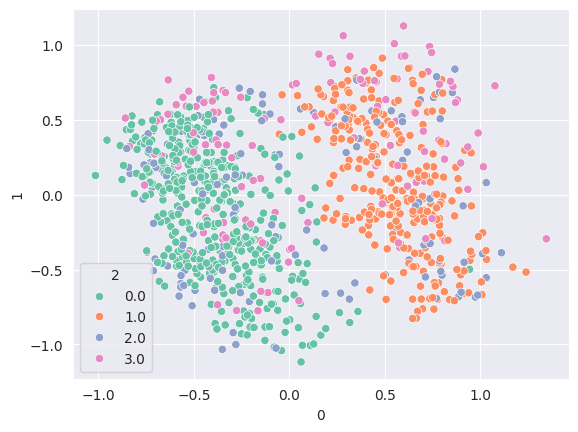

In [34]:
df_2d_clust = np.concatenate([df_2d, agg_4_full_wo_target.reshape(-1, 1)], axis=1)
sns.scatterplot(data=pd.DataFrame(df_2d_clust), x=0, y=1, hue=2, palette="Set2")

# Кластеризация (70% распределения)

Понизим размерность датасета, сохранив 70% информации. 
Для этого применим параметр `n_components=0.7` при выполнении преобразования

In [35]:
pca = PCA(n_components=0.7, random_state=42)
df_70 = pca.fit_transform(df_rescaled_)
df_70                          

array([[-0.57102724,  0.33179963,  0.17463003, ...,  0.11420875,
         0.03642573,  0.0706704 ],
       [-0.75474304,  0.18623691, -0.0174202 , ..., -0.50593109,
         0.50842431, -0.30463082],
       [-0.58664273, -0.0750728 , -0.01515038, ...,  0.28125811,
        -0.00221549,  0.47834766],
       ...,
       [ 1.24028499, -0.51877957,  0.41889684, ...,  0.21661644,
        -0.26881069, -0.36503481],
       [ 0.63529755,  0.14179363, -0.59674694, ...,  0.71177492,
         0.00456342, -0.753049  ],
       [-0.13569709, -0.12373045,  0.73453963, ...,  0.72624836,
         0.27767572, -0.1958674 ]])

## AgglomerativeClustering

Используя агломеративную кластеризацию, подберем оптимальное количество кластеров 
опираясь на указанные ранее метрики:
`Davies-Bouldin score` - при оптимальном разбиении метрика принимает МИНИМАЛЬНОЕ значение
`Calinski and Harabasz score` - при оптимальном разбиении метрика принимает МАКСИМАЛЬНОЕ значение
`Silhouette Coefficient` - при оптимальном разбиении метрика также принимает МАКСИМАЛЬНОЕ значение

In [36]:
d_b_scores.clear()
c_h_scores.clear()
sil_scores.clear()

for c in range(2, 11):
    agg_clust = AgglomerativeClustering(n_clusters=c).fit(df_70)
    d_b_scores.append(davies_bouldin_score(df_70, agg_clust.labels_))
    c_h_scores.append(calinski_harabasz_score(df_70, agg_clust.labels_))
    sil_scores.append(silhouette_score(df_70, agg_clust.labels_))
    
print("Clusters according Davies-Bouldin score: ", d_b_scores.index(min(d_b_scores)) + 2)
print("Clusters according Calinski and Harabasz score: ", c_h_scores.index(max(c_h_scores)) + 2)
print("Clusters according Silhouette Coefficient: ", sil_scores.index(max(sil_scores)) + 2)

Clusters according Davies-Bouldin score:  10
Clusters according Calinski and Harabasz score:  2
Clusters according Silhouette Coefficient:  4


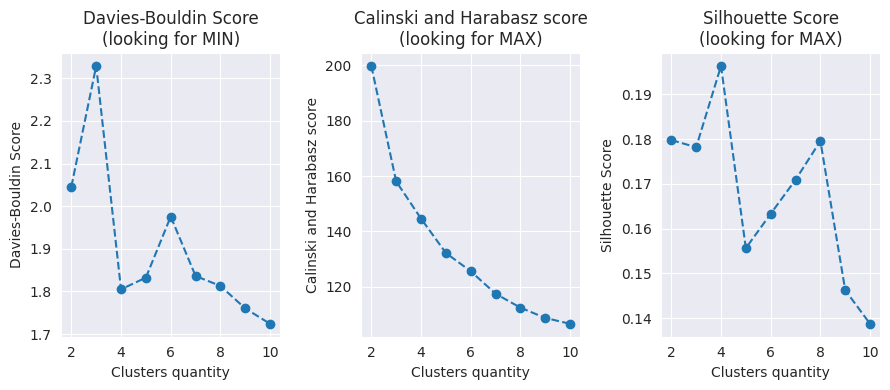

In [37]:
plot_clustering_scores(d_b_scores, c_h_scores, sil_scores)

Понижение размерности существенно повлияло на рекомендацию метрики Davies-Bouldin score.
Остальные остались верны своим предыдущим значениям: 
Calinski and Harabasz score - 2
Silhouette Coefficient - 4

Хотя если смотреть на графики метрик, то их форма не сильно изменилась и на графике
Davies-Bouldin score, как и ранее, видно резкое падение при переходе с 3 до 4 кластеров
и далее уже коэффициент меняется не в столь значительных пределах.

Поэтому остановимся на 4 кластерах.

In [38]:
agg_clust = AgglomerativeClustering(n_clusters=4).fit(df_70)
agg_4_70_wo_target = agg_clust.labels_

Посмотрим на графике будет ли отличаться распределение от варианта с полным датасетом

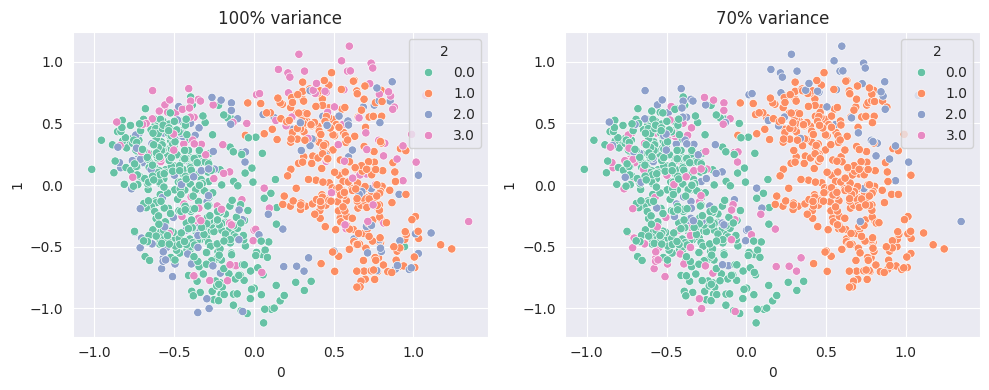

In [39]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].set_title("100% variance")
df_2d_clust = np.concatenate([df_2d, agg_4_full_wo_target.reshape(-1, 1)], axis=1)
sns.scatterplot(data=pd.DataFrame(df_2d_clust), x=0, y=1, hue=2, palette="Set2", ax=axes[0])

axes[1].set_title("70% variance")
df_2d_clust = np.concatenate([df_2d, agg_4_70_wo_target.reshape(-1, 1)], axis=1)
sns.scatterplot(data=pd.DataFrame(df_2d_clust), x=0, y=1, hue=2, palette="Set2", ax=axes[1])

plt.tight_layout()
plt.show()

По моему мнению при понижении размерности до 70% распределения, глобальных изменений в 
результатах кластеризации не произошло, но есть ряд локальных.

Во-первых, складывается впечатление, что минорные классы 2 и 3 поменялись местами,
хотя это не существенно - нет никакой разницы какая именно метка у класса.

Также посмотрите на серые точки класса 2 внутри оранжевых точек класса 1 на ЛЕВОМ графике.
Согласно озвученному ранее наблюдению, на ПРАВОМ графике они должны стать фиолетовыми 
точками класса 3. Но они на стали!

При понижении размерности до 70% распределения часть экземпляров минорного класса 2
классифицировалась, как экземпляры мажорного класса 1.


# Clastergram

В заключение построим кластерграммы на полных данных и при использовании 70%

K=1 skipped. Mean computed from data directly.


/home/serhii/PycharmProjects/hillel/ML/hillel_ml_learning_project/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K=2 fitted in 0.429 seconds.


/home/serhii/PycharmProjects/hillel/ML/hillel_ml_learning_project/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K=3 fitted in 0.680 seconds.


/home/serhii/PycharmProjects/hillel/ML/hillel_ml_learning_project/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K=4 fitted in 0.527 seconds.


/home/serhii/PycharmProjects/hillel/ML/hillel_ml_learning_project/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K=5 fitted in 0.638 seconds.


/home/serhii/PycharmProjects/hillel/ML/hillel_ml_learning_project/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K=6 fitted in 0.928 seconds.
K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.048 seconds.


/home/serhii/PycharmProjects/hillel/ML/hillel_ml_learning_project/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/serhii/PycharmProjects/hillel/ML/hillel_ml_learning_project/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/serhii/PycharmProjects/hillel/ML/hillel_ml_learning_project/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/

K=3 fitted in 0.030 seconds.
K=4 fitted in 0.030 seconds.
K=5 fitted in 0.063 seconds.
K=6 fitted in 0.048 seconds.


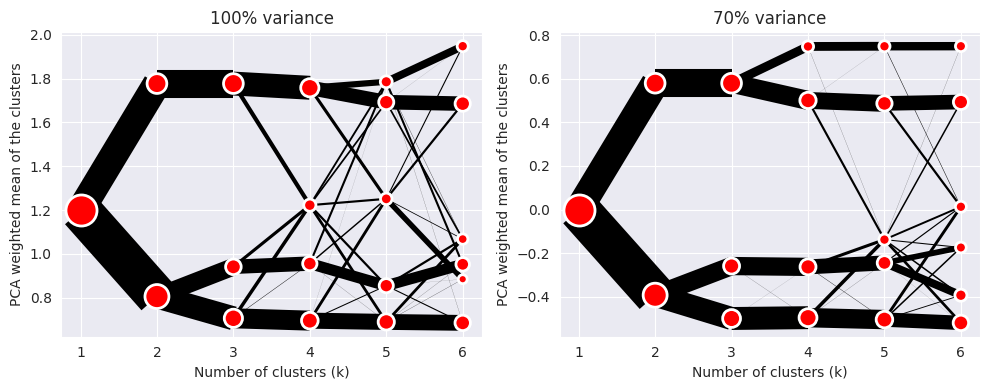

In [40]:
cgram = Clustergram(k_range = range(1, 7), backend="sklearn", method="kmeans")

_, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].set_title("100% variance")
cgram.fit(df_rescaled_)
cgram.plot(ax=axes[0])

axes[1].set_title("70% variance")
cgram.fit(df_70)
cgram.plot(ax=axes[1])

plt.tight_layout()
plt.show()

На диаграммах наглядно видно, что оптимальным разбиением для 100% данных по методу Kmeans 
является 3 кластера, что совпало с рекомендациями метрик, которые мы вычисляли ранее.
(см. выше: метод KMeans, датасет 100% после удаления из него таргета) 

В случае же понижения размерности датасета до уровня охвата 70% распределения, наиболее внятное 
разделение достигается при 4 кластерах, что также соответствует нашим выводам, полученным ранее. 
(см. выше: метод AgglomerativeClustering, датасет 70%)

# Выводы

Несколько попыток кластеризации и последующий анализ приводят к выводу, что 
наши данные можно разделить на 4 кластера (наиболее вероятно).
 
Чтобы докопаться до сути и выяснить как именно данные разделились на 
4 (а может на 3) :) кластера, как это разделение коррелирует с таргетом 
`credit_risk` и коррелирует ли вообще, нужно проводить дальнейший анализ.
Например, строить графики распределения признаков (как выше в самом начале),
но по-кластерно. 

Тема интересная, заниматься этим можно бесконечно! 
:))) 